In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Group 'Item_Type' by 'Item_Identifier'

In [6]:
Item_Types = [t[:2] for t in df['Item_Identifier']]    

In [7]:
df['Item_Types'] = Item_Types

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Types
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


## Drop Unwanted Features

In [9]:
# <<--- Drop 'Item_Identifier' and 'Outlet_Identifier' --->>

df.drop(labels=['Item_Identifier', 'Item_Type'], axis=1, inplace=True)

In [10]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Types
0,9.30,Low Fat,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,17.50,Low Fat,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,19.20,Regular,0.000000,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,8.93,Low Fat,0.000000,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


### As data collected is of Year 2013, so we will find age of outlet by subtracting 2013 from Outlet_Establishment_Year.

In [11]:
df['Outlet_Age'] = 2013 - df['Outlet_Establishment_Year']

In [12]:
# <<--- Drop 'Outlet_Establishment_Year' column as now it is of no use --->>

df.drop(labels='Outlet_Establishment_Year', axis=1, inplace=True)

In [13]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Types,Outlet_Age
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,182.0950,OUT010,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,26


## Exploring Data Irregularities

In [14]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [15]:
# <<--- Fix the 'Item_Fat_Content' irregularities--->>

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [16]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [17]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [18]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [19]:
df['Item_Types'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

## Handle Null Values

In [20]:
for i in range(0, df.shape[0]):
    
    if str(df.loc[i, 'Item_Weight']) == 'nan':
        row = df.iloc[i, :]
        
        Item_Fat_Content = row['Item_Fat_Content']
        Item_Types = row['Item_Types']
        
        mask = ((df['Item_Fat_Content'] == Item_Fat_Content) & (df['Item_Types'] == Item_Types))
        temp_df = df[mask]
        
        value = df['Item_Weight'].mean()
        
        df.loc[i, 'Item_Weight'] = value

In [21]:
# <<--- Item Weight --->>

In [22]:
# Fill the Null values of 'Item_Weight' by mean of respective 'Item_Fat_Content' and 'Item_Type'

for i in range(0, df.shape[0]):
    
    if str(df.iloc[i, 0]) == 'nan':
        row = df.iloc[i, :]
        item_fat_content = row['Item_Fat_Content']
        item_type = row['Item_Types']
        
        mask = ((df['Item_Fat_Content'] == item_fat_content) & (df['Item_Types'] == item_type))
        temp_df = df[mask] 
        mean_value = temp_df['Item_Weight'].mean()
        
        df.loc[i, 'Item_Weight'] = mean_value

In [23]:
# <<--- Outlet Size --->>

In [24]:
# Fill the Null values of 'Outlet_Size' by highest count of 'Outlet_Size' by 'Outlet_Type'

for i in range(0, df.shape[0]):
    
    if str(df.loc[i, 'Outlet_Size']) == 'nan':
        row = df.iloc[i, :]
        
        outlet_type = row['Outlet_Type']
        
        mask = (df['Outlet_Type'] == outlet_type)
        temp_df = df[mask]
        data = temp_df['Outlet_Size'].value_counts()
        
        try:
            maxx = data[0]
            ind = data.index[0]
            
            for index, j in zip(data.index, data):

                if j > maxx:
                    maxx = j
                    ind = index
                    df.loc[i, 'Outlet_Size'] = ind
                else:
                    df.loc[i, 'Outlet_Size'] = ind
        except IndexError:
            continue

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
Item_Weight             8523 non-null float64
Item_Fat_Content        8523 non-null object
Item_Visibility         8523 non-null float64
Item_MRP                8523 non-null float64
Outlet_Identifier       8523 non-null object
Outlet_Size             8523 non-null object
Outlet_Location_Type    8523 non-null object
Outlet_Type             8523 non-null object
Item_Outlet_Sales       8523 non-null float64
Item_Types              8523 non-null object
Outlet_Age              8523 non-null int64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [26]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Types,Outlet_Age
0,9.30,Low Fat,0.016047,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.000000,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,Low Fat,0.000000,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,NC,26


## Item Visibility

In [27]:
for index, visibility in zip(range(0, df.shape[0]), df['Item_Visibility']):
    
    if visibility == 0.0:
        row = df.loc[index, :]
        
        Item_Fat_Content = df.loc[index, 'Item_Fat_Content']
        Item_Types = df.loc[0, 'Item_Types']
        
        mask = ((df['Item_Fat_Content'] == Item_Fat_Content) & (df['Item_Types'] == Item_Types))
        temp_df = df[mask]
        
        value = df['Item_Visibility'].mean()
        
        df.loc[index, 'Item_Visibility'] = value

In [28]:
for index, types in zip(range(0, df.shape[0]), df['Item_Types']):
    if df.loc[index, 'Item_Types'] == 'NC':
        df.loc[index, 'Item_Fat_Content'] = 'Not Consumeable'

## Encode Categorical Variables

In [29]:
# <<--- Encode Categorical Variables -->>

final_df = pd.get_dummies(data=df, drop_first=True)

final_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,9.30,0.016047,249.8092,3735.1380,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,0.019278,48.2692,443.4228,4,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
2,17.50,0.016760,141.6180,2097.2700,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,0.066132,182.0950,732.3800,15,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,0.066140,53.8614,994.7052,26,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


Skewness of G1:  1.1775306028542798


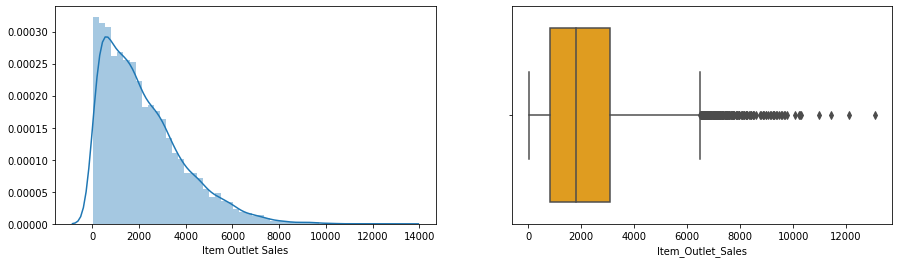

In [30]:
# <<<---- Analyse 'Item_Outlet_Sales' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Item_Outlet_Sales'], kde=True, ax=ax[0], axlabel='Item Outlet Sales')

sns.boxplot(x=final_df['Item_Outlet_Sales'], color='orange', ax=ax[1]) 

print(f'Skewness of G1: ', pd.Series(final_df['Item_Outlet_Sales']).skew())  # skewness for selling price

### Skewness is greter than 1, so our data is highly skewed.

In [31]:
# Remove Outliars

mask = (final_df['Item_Outlet_Sales'] > 10000) 
final_df[mask]

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
1009,12.857645,0.034584,248.3750,10236.6750,28,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
1450,12.857645,0.066834,253.0356,11445.1020,28,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4349,12.857645,0.088840,254.2672,10993.6896,28,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
4888,14.850000,0.019495,261.2910,10256.6490,26,0,1,1,0,0,...,0,0,0,0,1,1,0,0,1,0
5223,12.857645,0.014296,242.6512,12117.5600,28,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
6541,12.857645,0.030693,228.0352,10306.5840,28,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
7188,12.857645,0.010551,234.9958,13086.9648,28,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
7191,12.857645,0.044445,245.2802,10072.8882,28,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [32]:
final_df = final_df[~mask]
final_df.shape

(8515, 25)

In [33]:
# <<--- Natural Log the 'Item_Outlet_Sales' --->>

final_df['Item_Outlet_Sales'] = np.log(final_df['Item_Outlet_Sales'])

Skewness of Item_Outlet_Sales:  -0.8940127418190119


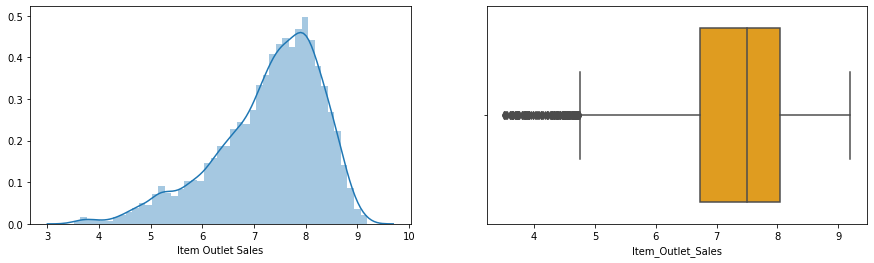

In [34]:
# <<<---- Analyse 'Item_Outlet_Sales' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Item_Outlet_Sales'], kde=True, ax=ax[0], axlabel='Item Outlet Sales')

sns.boxplot(x=final_df['Item_Outlet_Sales'], color='orange', ax=ax[1]) 

print(f'Skewness of Item_Outlet_Sales: ', pd.Series(final_df['Item_Outlet_Sales']).skew())  # Item_Outlet_Sales

### Note: Now we change the 'Item_Outlet_Sales' from heavily skewed to moderately skewed. This is the best I can do.

Skewness of Item_MRP:  0.12777574067928563


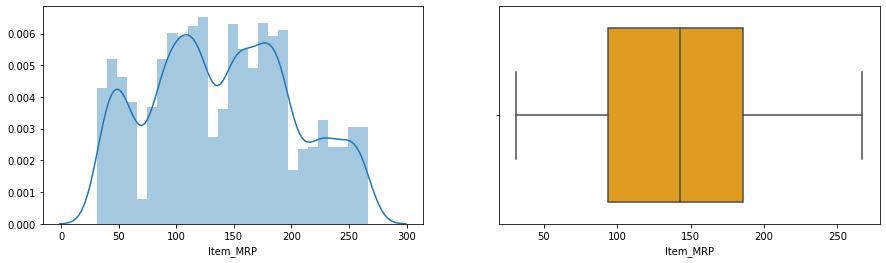

In [35]:
# <<<---- Analyse 'Item_MRP' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Item_MRP'], kde=True, ax=ax[0], axlabel='Item_MRP')

sns.boxplot(x=final_df['Item_MRP'], color='orange', ax=ax[1]) 

print(f'Skewness of Item_MRP: ', pd.Series(final_df['Item_MRP']).skew())  # skewness for Item_MRP

Skewness of Item_Visibility:  1.2790478649032095


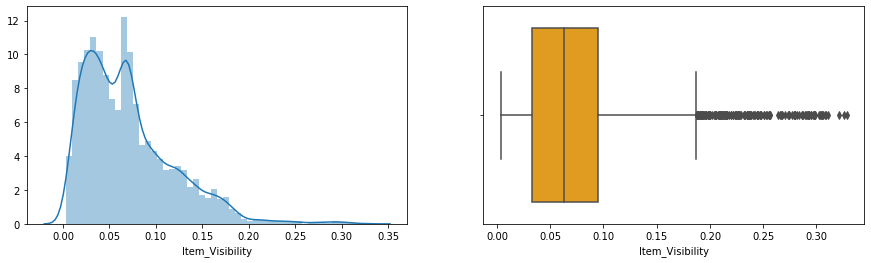

In [36]:
# <<<---- Analyse 'Item_Visibility' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Item_Visibility'], kde=True, ax=ax[0], axlabel='Item_Visibility')

sns.boxplot(x=final_df['Item_Visibility'], color='orange', ax=ax[1]) 

print(f'Skewness of Item_Visibility: ', pd.Series(final_df['Item_Visibility']).skew())  # skewness for Item_Visibility

In [37]:
# <<--- Natural Log the 'Item_Visibility' --->>

final_df['Item_Visibility'] = np.log(final_df['Item_Visibility'])

Skewness of Item_Visibility:  -0.4915086474066781


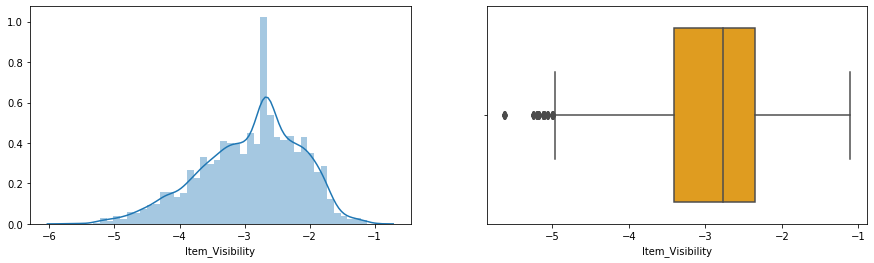

In [38]:
# <<<---- Analyse 'Item_Visibility' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Item_Visibility'], kde=True, ax=ax[0], axlabel='Item_Visibility')

sns.boxplot(x=final_df['Item_Visibility'], color='orange', ax=ax[1]) 

print(f'Skewness of Item_Visibility: ', pd.Series(final_df['Item_Visibility']).skew())  # skewness for Item_Visibility

Skewness of Item_Visibility:  0.09067626362163667


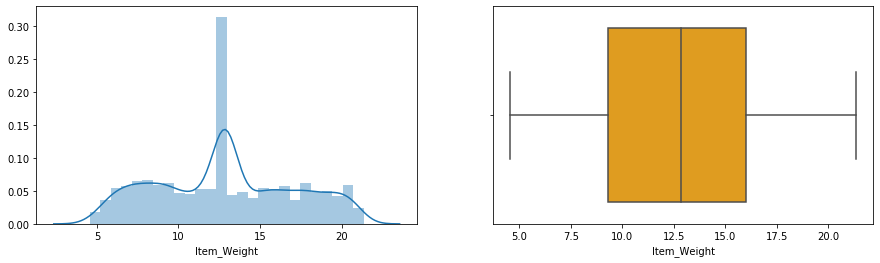

In [39]:
# <<<---- Analyse 'Item_Visibility' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Item_Weight'], kde=True, ax=ax[0], axlabel='Item_Weight')

sns.boxplot(x=final_df['Item_Weight'], color='orange', ax=ax[1]) 

print(f'Skewness of Item_Visibility: ', pd.Series(final_df['Item_Weight']).skew())  # skewness for Item_Visibility

Skewness of Item_Visibility:  0.3987416023828895


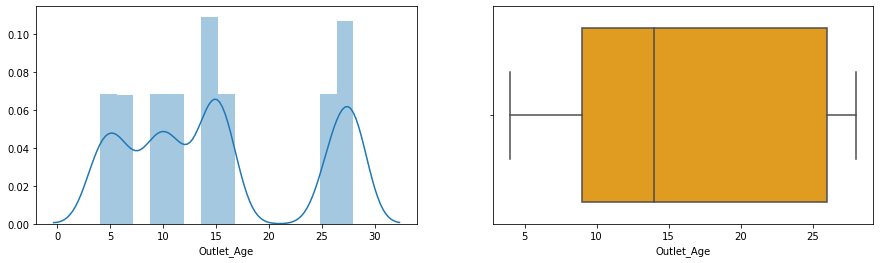

In [40]:
# <<<---- Analyse 'Outlet_Age' ---->>>

fig, ax =plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.distplot(a=final_df['Outlet_Age'], kde=True, ax=ax[0], axlabel='Outlet_Age')

sns.boxplot(x=final_df['Outlet_Age'], color='orange', ax=ax[1]) 

print(f'Skewness of Item_Visibility: ', pd.Series(final_df['Outlet_Age']).skew())  # skewness for Item_Visibility

In [41]:
final_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,9.30,-4.132215,249.8092,8.225540,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,-3.948780,48.2692,6.094524,4,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
2,17.50,-4.088756,141.6180,7.648392,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,-2.716102,182.0950,6.596300,15,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,-2.715985,53.8614,6.902446,26,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


In [42]:
final_df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,9.30,-4.132215,249.8092,8.225540,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.92,-3.948780,48.2692,6.094524,4,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
2,17.50,-4.088756,141.6180,7.648392,14,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.20,-2.716102,182.0950,6.596300,15,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.93,-2.715985,53.8614,6.902446,26,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1


## Independent and Dependent variables

In [43]:
columns = final_df.columns
columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Age', 'Item_Fat_Content_Not Consumeable',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Types_FD', 'Item_Types_NC'],
      dtype='object')

In [44]:
x_selected = ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Age', 'Item_Fat_Content_Not Consumeable',
       'Item_Fat_Content_Regular', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3', 'Item_Types_FD', 'Item_Types_NC']

In [45]:
X = final_df[x_selected]
Y = final_df['Item_Outlet_Sales']

In [46]:
X

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,9.300,-4.132215,249.8092,14,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,5.920,-3.948780,48.2692,4,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,17.500,-4.088756,141.6180,14,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,19.200,-2.716102,182.0950,15,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,8.930,-2.715985,53.8614,26,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,-2.868511,214.5218,26,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
8519,8.380,-3.057982,108.1570,11,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
8520,10.600,-3.347099,85.1224,9,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
8521,7.210,-1.929501,103.1332,4,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,1,0


In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X.iloc[:, :4] = ss.fit_transform(X.iloc[:, :4])

In [48]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,-0.841432,-1.596659,1.750578,-0.138211,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,-1.640901,-1.356901,-1.488749,-1.333485,0,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
2,1.098108,-1.539856,0.011635,-0.138211,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
3,1.500208,0.254264,0.662216,-0.018684,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,-0.928948,0.254418,-1.398866,1.296118,1,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,1


# Final Work with 'Testing data'

## Data Preprocessing

In [49]:
new_df = pd.read_csv('test.csv')

In [50]:
item_identifier = new_df['Item_Identifier']
outlet_identifier = new_df['Outlet_Identifier']

In [51]:
# <<--- Fix the 'Item_Fat_Content' irregularities--->>

new_df['Item_Fat_Content'] = new_df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [52]:
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [53]:
new_df['Outlet_Age'] = 2013 - new_df['Outlet_Establishment_Year']

In [54]:
Item_Types = [t[:2] for t in new_df['Item_Identifier']]    
new_df['Item_Types'] = Item_Types
new_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Types
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,14,FD
1,FDW14,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,6,FD
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,15,NC
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,6,FD
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,28,FD


In [55]:
new_df.drop(labels=['Item_Identifier'], axis=1, inplace=True)

In [56]:
for index, types in zip(range(0, new_df.shape[0]), new_df['Item_Types']):
    if new_df.loc[index, 'Item_Types'] == 'NC':
        new_df.loc[index, 'Item_Fat_Content'] = 'Not Consumeable'

In [57]:
for i in range(0, new_df.shape[0]):
    
    if str(new_df.loc[i, 'Item_Weight']) == 'nan':
        row = new_df.iloc[i, :]
        
        Item_Fat_Content = row['Item_Fat_Content']
        Item_Types = row['Item_Types']
        
        mask = ((new_df['Item_Fat_Content'] == Item_Fat_Content) & (new_df['Item_Types'] == Item_Types))
        temp_df = new_df[mask]
        
        value = temp_df['Item_Weight'].mean()
        
        new_df.loc[i, 'Item_Weight'] = value

In [58]:
# Fill the Null values of 'Outlet_Size' by highest count of 'Outlet_Size' by 'Outlet_Type'

for i in range(0, new_df.shape[0]):
    
    if str(new_df.loc[i, 'Outlet_Size']) == 'nan':
        row = new_df.iloc[i, :]
        
        outlet_type = row['Outlet_Type']
        
        mask = (new_df['Outlet_Type'] == outlet_type)
        temp_df = new_df[mask]
        data = temp_df['Outlet_Size'].value_counts()
        
        try:
            maxx = data[0]
            ind = data.index[0]
            
            for index, j in zip(data.index, data):

                if j > maxx:
                    maxx = j
                    ind = index
                    new_df.loc[i, 'Outlet_Size'] = ind
                else:
                    new_df.loc[i, 'Outlet_Size'] = ind
        except IndexError:
            continue

In [59]:
for index, visibility in zip(range(0, new_df.shape[0]), new_df['Item_Visibility']):
    
    if visibility == 0.0:
        row = new_df.loc[index, :]
        
        Item_Fat_Content = new_df.loc[index, 'Item_Fat_Content']
        Item_Types = new_df.loc[0, 'Item_Types']
        
        mask = ((new_df['Item_Fat_Content'] == Item_Fat_Content) & (new_df['Item_Types'] == Item_Types))
        temp_df = new_df[mask]
        
        value = new_df['Item_Visibility'].mean()
        
        new_df.loc[index, 'Item_Visibility'] = value

In [60]:
new_df['Item_Visibility'] = np.log(new_df['Item_Visibility'])

In [61]:
new_df.drop(labels='Outlet_Establishment_Year', axis=1, inplace=True)

In [62]:
new_df.drop(labels='Item_Type', axis=1, inplace=True)

In [63]:
new_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Age,Item_Types
0,20.750000,Low Fat,-4.884245,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14,FD
1,8.300000,Regular,-3.258977,87.3198,OUT017,Small,Tier 2,Supermarket Type1,6,FD
2,14.600000,Not Consumeable,-2.306845,241.7538,OUT010,Small,Tier 3,Grocery Store,15,NC
3,7.315000,Low Fat,-4.174142,155.0340,OUT017,Small,Tier 2,Supermarket Type1,6,FD
4,12.415879,Regular,-2.132005,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28,FD


In [64]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 10 columns):
Item_Weight             5681 non-null float64
Item_Fat_Content        5681 non-null object
Item_Visibility         5681 non-null float64
Item_MRP                5681 non-null float64
Outlet_Identifier       5681 non-null object
Outlet_Size             5681 non-null object
Outlet_Location_Type    5681 non-null object
Outlet_Type             5681 non-null object
Outlet_Age              5681 non-null int64
Item_Types              5681 non-null object
dtypes: float64(3), int64(1), object(6)
memory usage: 444.0+ KB


In [65]:
# <<--- Encode Categorical Variables -->>

new_X = pd.get_dummies(data=new_df, drop_first=True)

new_X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,20.750000,-4.884245,107.8622,14,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,8.300000,-3.258977,87.3198,6,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
2,14.600000,-2.306845,241.7538,15,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,7.315000,-4.174142,155.0340,6,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
4,12.415879,-2.132005,234.2300,28,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


In [66]:
# Scale the data

new_X.iloc[:, :4] = ss.transform(new_X.iloc[:, :4])

In [67]:
new_X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_Not Consumeable,Item_Fat_Content_Regular,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,...,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Types_FD,Item_Types_NC
0,1.866829,-2.579596,-0.530918,-0.138211,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,1,0
1,-1.077961,-0.455298,-0.861093,-1.094430,0,1,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
2,0.412173,0.789182,1.621105,-0.018684,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
3,-1.310943,-1.651459,0.227268,-1.094430,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
4,-0.104435,1.017706,1.500176,1.535172,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0


# Model Making

## Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [69]:
# <<--- K fold cross validation --->> Before Parameter Tuning
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator = random_forest_regressor, scoring='r2', X = X, y = Y, cv = 10) 

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 67.89 %
Standard Deviation: 2.45 %


In [70]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [71]:
# Create the Random grid

parameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [72]:
# <<-- Check the best Random Forest Regression Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = random_forest_regressor,
                           param_distributions  = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(X, Y)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best R Square: 72.10 %
Best Parameters: {'n_estimators': 1709, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [74]:
final_random_forest_regressor = RandomForestRegressor(n_estimators= 1709, min_samples_split= 5, min_samples_leaf= 4, 
                                                      max_features= 'sqrt', max_depth= 20, bootstrap= True)
final_random_forest_regressor.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1709,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [75]:
final_random_forest_predictions = final_random_forest_regressor.predict(new_X)

In [76]:
# <<--- Bring Final predictions to original scale --->>

final_random_forest_predictions = 2.718**final_random_forest_predictions

In [77]:
# <--- Save Random forest Model --->

import pickle

with open('Random Forest Regressor.txt','wb') as f:
    pickle.dump(final_random_forest_regressor, f)

In [78]:
data = list(zip(item_identifier, outlet_identifier, final_random_forest_predictions))

final_random_forest_df = pd.DataFrame(data=data, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [79]:
final_random_forest_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1413.626417
1,FDW14,OUT017,1222.424176
2,NCN55,OUT010,612.589077
3,FDQ58,OUT017,2057.218498
4,FDY38,OUT027,4628.623435


In [80]:
final_random_forest_df.to_csv('Random_Forest.csv')

## XGBoost 

In [81]:
from xgboost import XGBRegressor

final_xgboost_regressor = XGBRegressor()
final_xgboost_regressor.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [82]:
# <<--- K fold cross validation --->> Before Parameter Tuning

accuracies = cross_val_score(estimator = final_xgboost_regressor, scoring='r2', X = X, y = Y, cv = 10)  # arguments are self explanatory

print("Average R Square: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Average R Square: 70.09 %
Standard Deviation: 2.58 %


In [83]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

parameters = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : max_depth,
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
 "n_estimators": n_estimators}

In [84]:
# <<-- Check the best XGBoost Regression Model by parameter tuning -->>

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = final_xgboost_regressor,
                           param_distributions  = parameters,
                           scoring = 'r2', 
                           cv = 10,
                           n_jobs=1)

random_search = random_search.fit(X, Y)

best_accuracy = random_search.best_score_   
best_parameters = random_search.best_params_  

print("Best R Square: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best R Square: 72.16 %
Best Parameters: {'n_estimators': 300, 'min_child_weight': 7, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.4}


In [85]:
# Make new XGBoost model with best parameters

final_xgboost_regressor = XGBRegressor(n_estimators= 300, min_child_weight= 7, max_depth= 5, learning_rate= 0.2, gamma= 0.4, 
                                       colsample_bytree= 0.4)
final_xgboost_regressor.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.4, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=5,
             min_child_weight=7, missing=nan, monotone_constraints='()',
             n_estimators=300, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [86]:
final_xgboost_predictions = final_xgboost_regressor.predict(new_X)

In [87]:
# <<--- Bring Final predictions to original scale --->>

final_xgboost_predictions = 2.718**final_xgboost_predictions

In [88]:
# <--- Save Random forest Model --->

import pickle

with open('XGBoost Regressor.txt','wb') as f:
    pickle.dump(final_xgboost_regressor, f)

In [89]:
data = list(zip(item_identifier, outlet_identifier, final_xgboost_predictions))

final_xgboost_df = pd.DataFrame(data=data, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])

In [90]:
final_xgboost_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1394.351074
1,FDW14,OUT017,1341.077881
2,NCN55,OUT010,505.117493
3,FDQ58,OUT017,2107.123779
4,FDY38,OUT027,4433.788086


In [91]:
final_xgboost_df.to_csv('XGBoost.csv')

In [ ]:
new_X.dtypes